In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from logistic_regression import LogisticRegression

## Synthetic Data Testing

Iteration: 0, Loss: 0.6738
Iteration: 10, Loss: 0.1528
Iteration: 20, Loss: 0.0924
Iteration: 30, Loss: 0.0684
Iteration: 40, Loss: 0.0553
Iteration: 50, Loss: 0.0468
Iteration: 60, Loss: 0.0410
Iteration: 70, Loss: 0.0366
Iteration: 80, Loss: 0.0332
Iteration: 90, Loss: 0.0304
Iteration: 99, Loss: 0.0284


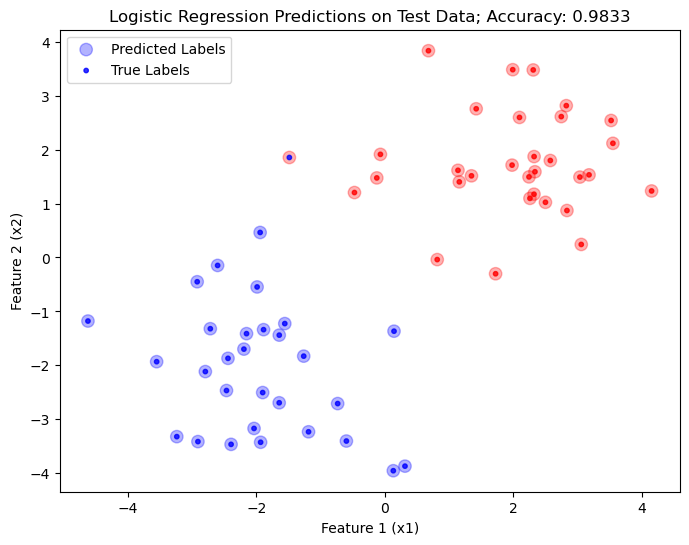

In [2]:
df = pd.read_csv("../data/synthetic_data.csv")
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h = LogisticRegression(learning_rate=0.1, verbose=True)
h.fit(X_train,y_train)

y_test_hat = h.predict(X_test)
score = h.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat, cmap='bwr', alpha=0.3, s=80, facecolors='none', label="Predicted Labels")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.8, s=10, label="True Labels")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.title(f"Logistic Regression Predictions on Test Data; Accuracy: {score:.4f}")
plt.legend()
plt.show()

## Breast Cancer Wisconsin Dataset

In [3]:
df = pd.read_csv("../data/breast_cancer_data.csv")

X = df.drop(columns=["Label"]).values  # Features
y = df["Label"].values  # Labels (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Normalize training data
X_test = scaler.transform(X_test)        # Normalize test data

Iteration: 0, Loss: 0.6994
Iteration: 10, Loss: 0.5486
Iteration: 20, Loss: 0.4616
Iteration: 30, Loss: 0.4054
Iteration: 40, Loss: 0.3657
Iteration: 50, Loss: 0.3361
Iteration: 60, Loss: 0.3130
Iteration: 70, Loss: 0.2944
Iteration: 80, Loss: 0.2790
Iteration: 90, Loss: 0.2659
Iteration: 100, Loss: 0.2547
Iteration: 110, Loss: 0.2450
Iteration: 120, Loss: 0.2364
Iteration: 130, Loss: 0.2288
Iteration: 140, Loss: 0.2219
Iteration: 150, Loss: 0.2158
Iteration: 160, Loss: 0.2102
Iteration: 170, Loss: 0.2050
Iteration: 180, Loss: 0.2003
Iteration: 190, Loss: 0.1960
Iteration: 199, Loss: 0.1923

Model Accuracy: 0.9737


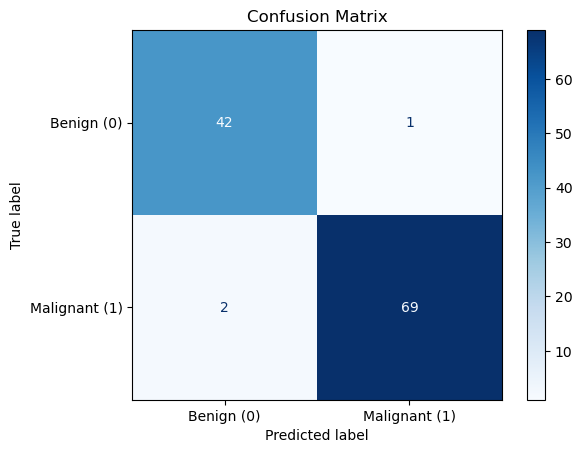

In [4]:
model = LogisticRegression(learning_rate=0.01, epochs=200, verbose=True)
model.fit(X_train,y_train)

y_test_hat = model.predict(X_test)
score = model.score(X_test, y_test)

print(f"\nModel Accuracy: {score:.4f}")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_hat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Comparison

Accuracy: 0.9737


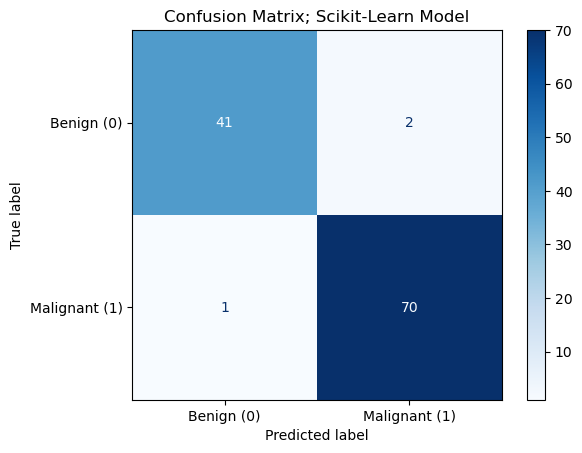

In [5]:
from sklearn.linear_model import LogisticRegression as LinearRegressionSKL
from sklearn.metrics import accuracy_score

sklmodel = LinearRegressionSKL()
sklmodel.fit(X_train, y_train)
y_test_skl = sklmodel.predict(X_test)
score_skl = accuracy_score(y_test, y_test_skl)
print(f"Accuracy: {score_skl:.4f}")

# Generate confusion matrix
cm_skl = confusion_matrix(y_test, y_test_skl)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_skl, display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix; Scikit-Learn Model")
plt.show()